# Load Freely Moving Mice Motion Marker .npy file

(17090718,)
MEAN -532.4718149449093
MAX -416.107177734375
MIN -843.353271484375


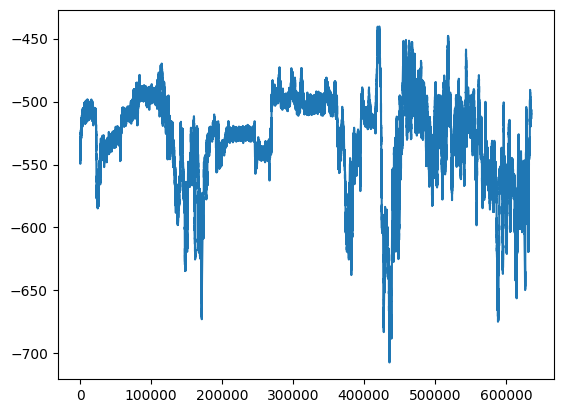

In [38]:
import numpy as np
import matplotlib.pyplot as plt
mice = '20250310_VN_tremor'
path = f'/data1/zhangyuhao/xinchao_data/NP2/{mice}/Marker/'
raw_data = np.load(path + 'motion_marker.npy')
raw_data = raw_data[0]
print(raw_data.shape)
fs = 10593.2
print("MEAN", np.mean(raw_data))
print("MAX", np.max(raw_data))
print("MIN", np.min(raw_data))
plt.plot(raw_data[int(60*fs):int(120*fs)])  # 没动就是平的，动了才会变化，向上向下分别代表压力传感器的方向

# Dectect Motion times

In [32]:
def detect_edges_with_binarization(signal, sampling_rate, threshold):
    """
    通过二值化检测信号的上升沿和下降沿时刻

    参数:
        signal: 输入的一维信号数组
        sampling_rate: 采样率 (单位: Hz)
        threshold: 二值化阈值，默认为低电平和高电平的中间值
    
    返回:
        rise_times: 上升沿时刻数组 (单位: 秒)
        fall_times: 下降沿时刻数组 (单位: 秒)
    """
    # 步骤1: 二值化信号（高电平为0，低电平为1）
    binary_signal = np.where(signal <= threshold, 1, 0)
    
    # 步骤2: 检测跳变（通过相邻元素的差值）
    diff_binary = np.diff(binary_signal)
    
    # 步骤3: 提取跳变位置
    # 上升沿：0→1跳变（差值为+1）
    rise_indices = np.where(diff_binary == 1)[0]
    # 下降沿：1→0跳变（差值为-1）
    fall_indices = np.where(diff_binary == -1)[0]
    
    # 步骤4: 转换为时间（补偿diff导致的索引偏移）
    rise_times = (rise_indices + 1) / sampling_rate
    fall_times = (fall_indices + 1) / sampling_rate
    
    return rise_times, fall_times

sampling_rate = 10593.2   # 采样率
threshold = np.mean(raw_data)         # 根据高低电平的中间值设定

rise_times, fall_times = detect_edges_with_binarization(raw_data, sampling_rate, threshold)

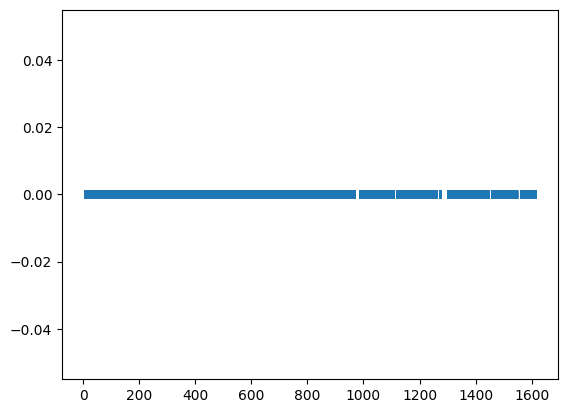

In [33]:
# 合并并排序
all_edges = np.concatenate([rise_times, fall_times])
ordered_edges = np.sort(all_edges)
plt.plot(ordered_edges, np.zeros_like(ordered_edges), '|', label='Edges')

In [34]:
np.save(path + 'rise_times.npy', rise_times)
np.save(path + 'fall_times.npy', fall_times)
np.save(path + 'run_stop_times_evenRun_odd_Stop.npy', ordered_edges)